# Data Exploration

In [1]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
            print('Url: ', path)
            print('Raw data:', raw_path)
        else:
            print('Url: ', self.url)
            print('Raw data:', self.url)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os
        if os.path.exists(self.file_name): os.remove(self.file_name)
        else: print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        import time
        print(self.file_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

%matplotlib inline

import datetime
year_now = datetime.date.today().year

## Read Datas of Animal Production

### Read Livestock Production Data

In [6]:
# input
item = 'product_livestock'

# output
data_name = item + '_clean.csv'
doc_name = item + '_doc.csv'

If you haven't cloned the whole repository from [Github](https://github.com/good-food/datamap2019), please uncomment and run the top 2 lines or else, run the bottom 2 lines or clone the reporsitory first.

In [7]:
# df_data = ReadData(data_name).createDF()
# df_doc = ReadData(doc_name).createDF()

df_data = pd.read_csv('./data/'+data_name)
df_doc = pd.read_csv('./data/'+doc_name)

In [9]:
df_data.head()

AreaName  Year  Stock_largeAni  Stock_cattle  Stock_horse  Stock_donkey  \
0    China  1996        13360.60      11031.80       871.50        944.40   
1    China  1997        14541.80      12175.70       891.20        952.80   
2    China  1998        14803.20      12441.90       898.10        955.80   
3    China  1999        15024.75      12698.34       891.41        934.77   
4    China  2000        15151.51      12866.34       876.58        922.73   

   Stock_mule  Stock_camel   Out_hog  Stock_hog     ...      MeatYield_gt_shp  \
0      478.00        34.90  41225.10   36283.60     ...            181.000000   
1      480.60        35.00  46483.70   40034.80     ...            212.800000   
2      473.90        33.50  50215.10   42256.30     ...            234.600000   
3      467.27        32.96  51977.20   43144.20     ...            251.264300   
4      453.03        32.62  52673.34   44681.54     ...            273.958296   

    MilkYield  MilkYield_cattle  WoolYield_sheep  WoolYield_sheep_fine  \
0  735.800000         629.40000         298102.0              121020.0   
1  681.100000         601.10000         255059.0              116054.0   
2  745.400000         662.90000         277545.0              115752.0   
3  806.907300         717.59390         283152.0              114103.0   
4  919.118908         827.43079         292502.0              117386.0   

   WoolYield_sheep_semi  WoolYield_goat_thick  WoolYield_goat_cashmere  \
0               74099.0               35255.0                  9585.00   
1               55683.0               25865.0                  8626.00   
2               68775.0               31417.0                  9799.00   
3               73700.0               31849.0                 10179.65   
4               84921.0               33266.0                 11057.00   

   EggYield  HoneyYield  
0  1965.200     18.4000  
1  1895.300     21.1000  
2  2021.300     20.7000  
3  2134.667     22.9907  
4  2243.300     24.6000  

[5 rows x 30 columns]

In [10]:
df_doc

Field name                   中文解释  \
0                  AreaName                地区 (省级)   
1                      Year                     年份   
2            Stock_largeAni    大动物存栏量 (牛&马&驴&骡&骆驼)   
3              Stock_cattle                   牛存栏量   
4               Stock_horse                   马存栏量   
5              Stock_donkey                   驴存栏量   
6                Stock_mule                   骡存栏量   
7               Stock_camel                  骆驼存栏量   
8                   Out_hog                   猪出栏量   
9                 Stock_hog                   猪存栏量   
10             Stock_gt_shp           羊存栏量 (绵羊&山羊)   
11               Stock_goat                  山羊存栏量   
12              Stock_sheep                  绵羊存栏量   
13               Out_cattle                   牛出栏量   
14               Out_gt_shp                   羊出栏量   
15              Out_poultry                  家禽出栏量   
16                MeatYield            肉类产量 (所有品类)   
17   MeatYield_hg_ct_gt_shp  主要家畜的肉类产量 (牛&猪&山羊&绵羊)   
18            MeatYield_hog                   猪肉产量   
19         MeatYield_cattle                   牛肉产量   
20         MeatYield_gt_shp           羊肉产量 (山羊&绵羊)   
21                MilkYield             奶产量 (所有品类)   
22         MilkYield_cattle                   牛奶产量   
23          WoolYield_sheep        绵羊毛产量 (所有绵羊毛品类)   
24     WoolYield_sheep_fine                 细绵羊毛产量   
25     WoolYield_sheep_semi                半细绵羊毛产量   
26     WoolYield_goat_thick                 粗山羊毛产量   
27  WoolYield_goat_cashmere                  山羊绒产量   
28                 EggYield                   禽蛋产量   
29               HoneyYield                   蜂蜜产量   

                                Explanation     单位: Unit  
0                         Area (provincial)          Nan  
1                                      Year          Nan  
2   Stock of cattle&hores&donkey&mule&camel  万只: 10000 #  
3                           Stock of cattle  万只: 10000 #  
4                            Stock of horse  万只: 10000 #  
5                           Stock of donkey  万只: 10000 #  
6                             Stock of mule  万只: 10000 #  
7                            Stock of camel  万只: 10000 #  
8                             Output of hog  万只: 10000 #  
9                              Stock of hog  万只: 10000 #  
10                      Stock of sheep&goat  万只: 10000 #  
11                            Stock of goat  万只: 10000 #  
12                           Stock of sheep  万只: 10000 #  
13                         Output of cattle  万只: 10000 #  
14                          Output of sheep  万只: 10000 #  
15                        Output of poultry  万只: 10000 #  
16    Meat yield from all kind of livestock  万吨: 10000 t  
17    Meat yield from cattle&hog&goat&sheep  万吨: 10000 t  
18                      Meat yield from hog  万吨: 10000 t  
19                   Meat yield from cattle  万吨: 10000 t  
20               Meat yield from goat&sheep  万吨: 10000 t  
21    Milk yield from all kind of livestock  万吨: 10000 t  
22                   Milk yield from cattle  万吨: 10000 t  
23            Wool yield from sheep (total)         吨: t  
24             Wool yield from sheep (fine)         吨: t  
25        Wool yield from sheep (semi-fine)         吨: t  
26             Wool yield from goat (thick)         吨: t  
27          Wool yield from goat (cashmere)         吨: t  
28                   Egg yield from poultry  万吨: 10000 t  
29                              Honey yield  万吨: 10000 t

In [11]:
df_livestock = df_data

### Read Aquatic Production Data

In [14]:
# input
item = 'product_aquatic'

# output
data_name = item + '_clean.csv'
doc_name = item + '_doc.csv'

If you haven't cloned the whole repository from [Github](https://github.com/good-food/datamap2019), please uncomment and run the top 2 lines or else, run the bottom 2 lines or clone the reporsitory first.

In [15]:
# df_data = ReadData(data_name).createDF()
# df_doc = ReadData(doc_name).createDF()

df_data = pd.read_csv('./data/'+data_name)
df_doc = pd.read_csv('./data/'+doc_name)

In [16]:
df_data.head()

AreaName  Year  Aqu_sum    AquSW  AquSW_grow  AquSW_cult  AquSW_fish  \
0    CNADC  1998  27.4100  27.4100     27.4100         0.0     25.1100   
1    CNADC  1999  18.3000  18.3000     18.3000         0.0      9.5100   
2    CNADC  2000  17.5823  17.5823     17.5823         0.0      7.7602   
3    CNADC  2001  18.2977  18.2977     18.2977         0.0      8.9539   
4    CNADC  2002  18.2177  18.2177     18.2177         0.0      9.6000   

   AquSW_crust  AquSW_shell  AquSW_algae  AquSW_other  AquFW  AquFW_grow  \
0       0.2000       0.1000          0.0       2.0000    0.0         0.0   
1       0.3200       8.4700          0.0       0.0000    0.0         0.0   
2       0.2194       9.6027          0.0       0.0000    0.0         0.0   
3       0.2250       9.1188          0.0       0.0000    0.0         0.0   
4       0.1000       0.0000          0.0       8.4604    0.0         0.0   

   AquFW_cult  AquFW_fish  AuFW_crust  AquFW_shell  AquFW_other  
0         0.0         0.0         0.0          0.0          0.0  
1         0.0         0.0         0.0          0.0          0.0  
2         0.0         0.0         0.0          0.0          0.0  
3         0.0         0.0         0.0          0.0          0.0  
4         0.0         0.0         0.0          0.0          0.0

In [17]:
df_doc

Field name     中文解释                                        Explanation  \
0      AreaName  地区 (省级)                                  Area (provincial)   
1          Year       年份                                               Year   
2       Aqu_sum    水产总产量              Aquatic total yield (sea&fresh water)   
3         AquSW    海产品产量  Aquatic yield from sea water (fish&crust&shell...   
4    AquSW_grow  海产品捕捞产量           Aquatic yield by catching from sea water   
5    AquSW_cult  海产品养殖产量          Aquatic yield by aquaculture in sea water   
6    AquSW_fish   海洋鱼类产量                          Fish yield from sea water   
7   AquSW_crust   海洋虾蟹产量                   Crab&shrimp yield from sea water   
8   AquSW_shell   海洋贝类产量                     Shellfish yield from sea water   
9   AquSW_algae   海洋藻类产量                         Algae yield from sea water   
10  AquSW_other  海产品其他产量                         Other yield from sea water   
11        AquFW   淡水产品产量  Aquatic yield from fresh water (fish&crust&she...   
12   AquFW_grow   淡水捕捞产量         Aquatic yield by catching from fresh water   
13   AquFW_cult   淡水养殖产量        Aquatic yield by aquaculture in fresh water   
14   AquFW_fish   淡水鱼类产量                        Fish yield from fresh water   
15   AuFW_crust   淡水虾蟹产量                 Crab&shrimp yield from fresh water   
16  AquFW_shell   淡水贝类产量                   Shellfish yield from fresh water   
17  AquFW_other   淡水其他产量                       Other yield from fresh water   

       单位: Unit  
0           Nan  
1           Nan  
2   万吨: 10000 t  
3   万吨: 10000 t  
4   万吨: 10000 t  
5   万吨: 10000 t  
6   万吨: 10000 t  
7   万吨: 10000 t  
8   万吨: 10000 t  
9   万吨: 10000 t  
10  万吨: 10000 t  
11  万吨: 10000 t  
12  万吨: 10000 t  
13  万吨: 10000 t  
14  万吨: 10000 t  
15  万吨: 10000 t  
16  万吨: 10000 t  
17  万吨: 10000 t

In [18]:
df_aquatic = df_data

## Merge Livestock and Aquatic Production Data

### Merge Data Frames

In [22]:
df_data = pd.merge(df_livestock, df_aquatic, on=['AreaName', 'Year'], how='outer')
df_data.head()

AreaName  Year  Stock_largeAni  Stock_cattle  Stock_horse  Stock_donkey  \
0    China  1996        13360.60      11031.80       871.50        944.40   
1    China  1997        14541.80      12175.70       891.20        952.80   
2    China  1998        14803.20      12441.90       898.10        955.80   
3    China  1999        15024.75      12698.34       891.41        934.77   
4    China  2000        15151.51      12866.34       876.58        922.73   

   Stock_mule  Stock_camel   Out_hog  Stock_hog     ...       AquSW_shell  \
0      478.00        34.90  41225.10   36283.60     ...          852.6800   
1      480.60        35.00  46483.70   40034.80     ...          824.1800   
2      473.90        33.50  50215.10   42256.30     ...          870.0900   
3      467.27        32.96  51977.20   43144.20     ...          959.2700   
4      453.03        32.62  52673.34   44681.54     ...         1038.6671   

   AquSW_algae  AquSW_other      AquFW  AquFW_grow  AquFW_cult  AquFW_fish  \
0      92.9100      39.1300  1275.2200    176.2700   1098.9500  1177.80000   
1      97.9800      64.4000  1425.3500    188.6400   1236.7100  1324.88000   
2     104.1200      67.9700  1549.7900    228.3400   1321.4100  1425.21000   
3     119.4500      58.2200  1650.4900    227.7700   1422.7200  1517.12000   
4     122.1973      47.7943  1739.7456    226.3652   1513.3804  1573.05924   

   AuFW_crust  AquFW_shell  AquFW_other  
0    36.28000      48.4000      12.7300  
1    47.79000      36.3800      16.3000  
2    60.43000      45.7900      18.3200  
3    70.70000      42.9600      19.7300  
4    88.29966      46.3064      32.0631  

[5 rows x 46 columns]

In [23]:
df_data.head()

AreaName  Year  Stock_largeAni  Stock_cattle  Stock_horse  Stock_donkey  \
0    China  1996        13360.60      11031.80       871.50        944.40   
1    China  1997        14541.80      12175.70       891.20        952.80   
2    China  1998        14803.20      12441.90       898.10        955.80   
3    China  1999        15024.75      12698.34       891.41        934.77   
4    China  2000        15151.51      12866.34       876.58        922.73   

   Stock_mule  Stock_camel   Out_hog  Stock_hog     ...       AquSW_shell  \
0      478.00        34.90  41225.10   36283.60     ...          852.6800   
1      480.60        35.00  46483.70   40034.80     ...          824.1800   
2      473.90        33.50  50215.10   42256.30     ...          870.0900   
3      467.27        32.96  51977.20   43144.20     ...          959.2700   
4      453.03        32.62  52673.34   44681.54     ...         1038.6671   

   AquSW_algae  AquSW_other      AquFW  AquFW_grow  AquFW_cult  AquFW_fish  \
0      92.9100      39.1300  1275.2200    176.2700   1098.9500  1177.80000   
1      97.9800      64.4000  1425.3500    188.6400   1236.7100  1324.88000   
2     104.1200      67.9700  1549.7900    228.3400   1321.4100  1425.21000   
3     119.4500      58.2200  1650.4900    227.7700   1422.7200  1517.12000   
4     122.1973      47.7943  1739.7456    226.3652   1513.3804  1573.05924   

   AuFW_crust  AquFW_shell  AquFW_other  
0    36.28000      48.4000      12.7300  
1    47.79000      36.3800      16.3000  
2    60.43000      45.7900      18.3200  
3    70.70000      42.9600      19.7300  
4    88.29966      46.3064      32.0631  

[5 rows x 46 columns]

### New Data Outline

In [24]:
print('There are {} rows and {} columns in the data frame.\n'.format(df_data.shape[0],df_data.shape[1]))

feilds = df_data.columns.values.tolist()
print('Fields list =', feilds, '\n')

areas = df_data['AreaName'].unique()
print('Areas list =',areas, '\n')

There are 695 rows and 46 columns in the data frame.

Fields list = ['AreaName', 'Year', 'Stock_largeAni', 'Stock_cattle', 'Stock_horse', 'Stock_donkey', 'Stock_mule', 'Stock_camel', 'Out_hog', 'Stock_hog', 'Stock_gt_shp', 'Stock_goat', 'Stock_sheep', 'Out_cattle', 'Out_gt_shp', 'Out_poultry', 'MeatYield', 'MeatYield_hg_ct_gt_shp', 'MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp', 'MilkYield', 'MilkYield_cattle', 'WoolYield_sheep', 'WoolYield_sheep_fine', 'WoolYield_sheep_semi', 'WoolYield_goat_thick', 'WoolYield_goat_cashmere', 'EggYield', 'HoneyYield', 'Aqu_sum', 'AquSW', 'AquSW_grow', 'AquSW_cult', 'AquSW_fish', 'AquSW_crust', 'AquSW_shell', 'AquSW_algae', 'AquSW_other', 'AquFW', 'AquFW_grow', 'AquFW_cult', 'AquFW_fish', 'AuFW_crust', 'AquFW_shell', 'AquFW_other'] 

Areas list = ['China' 'Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Inner Mongolia' 'Liaoning'
 'Jilin' 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui' 'Fujian'
 'Jiangxi' 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangd

## Data Exploration
### Group the Columns We Interested in

We are interested in the following columns, and they can be grouped for further analysis (the columns may overlaped in defferent groups): 

- **Animal product yields:**

    - 'MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp', 'EggYield', 'MilkYield_cattle', 'Aqu_sum'
    

- **Cattle, hog, goat&sheep:**

    - 'Stock_hog','Stock_cattle','Stock_gt_shp'
    - 'Out_hog', 'Out_cattle','Out_gt_shp'
    - 'MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp'
    - 'Stock_hog', 'Out_hog', 'MeatYield_hog'
    - 'Stock_cattle', 'Out_cattle', 'MeatYield_cattle'
    - 'Stock_gt_shp', 'Out_gt_shp', 'MeatYield_gt_shp'
    
    
- **Poultry:**

    - 'Out_poultry', 'EggYield'
    
    
- **Aquatic yields:**

    - 'AquSW', 'AquSW_grow', 'AquSW_cult', 'AquFW', 'AquFW_grow', 'AquFW_cult'
    - 'AquSW_fish', 'AquSW_crust', 'AquSW_shell', 'AquSW_algae'
    - 'AquFW_fish', 'AuFW_crust', 'AquFW_shell', 'AquFW_other'
    
So, we will visualize data from those aspect.

### Animal Product Yeilds

#### Draw Trends Lines for China National Animal Production of Food 

In [139]:
# set font size
tit_size = 16    # titles
lab_size = 15    # labels
leg_size = 13    # legends
tck_size = 13    # ticklabels

# ticks for X axes of 'Year'
ticks_year = range(1996,year_now,2)

# set legends
def setLeg(ax, labels, location='best'):
    ax.legend(labels, loc=location, frameon=False, fontsize=leg_size)

# set xlabels to 'Years'
def setX_years(ax, ticks):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0],ticks[-1])
    ax.set_xticklabels(ticks, rotation=40, ha='center', fontsize=tck_size)
    ax.set_xlabel('Years', fontsize=lab_size)
    
# set ylables to 'Number of Animals (10000 #)'
def setY_num(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=tck_size)
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=lab_size)
    
# set ylables to 'Yields Weight (10000 t)'
def setY_wei(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=tck_size)
    ax.set_ylabel('Yields Weight (10000 t)', fontsize=lab_size)

# only left and bottom spines can be seen
def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# only bottom spines can be seen
def setSpi_B(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [140]:
ch = 'brown'          # hog 
cc = 'limegreen'      # cattle 
cgs = 'darkorange'    # goat&sheep  
cbe = 'hotpink'       # bird egg 
cm = 'grey'           # cow milk 
ca = 'aqua'           # aquatic 

In [141]:
yields = ['MeatYield_hog', 'MeatYield_cattle', 'MeatYield_gt_shp', 'EggYield', 'MilkYield_cattle', 'Aqu_sum']

AY = ['AreaName', 'Year']

# Areas = df['AreaName'].unique().tolist()
# Areas.remove('China', 'CNADC')

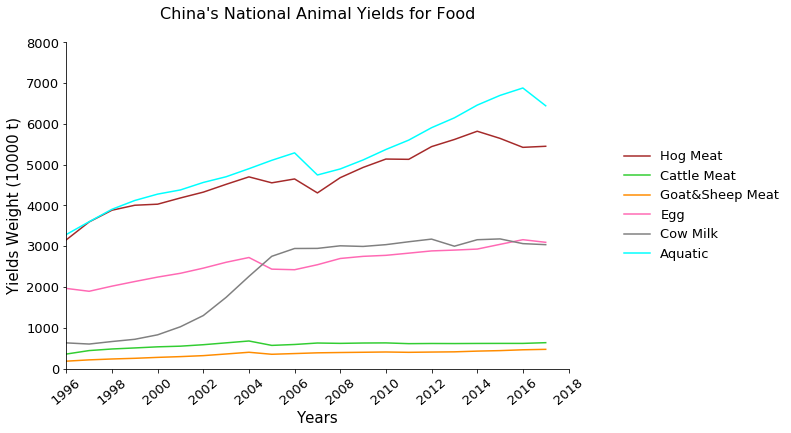

In [143]:
#---------------------------------------------------------------------------------------------#
#                   Create a Plot of China's National Animal Products for Food                #
#---------------------------------------------------------------------------------------------#

fig_size = (9,6)
colors = [ch, cc, cgs ,cbe, cm, ca]

df_yields = df[AY+yields].sort_values(['Year'], ascending=True, axis=0)

ax0 = df_yields[df_yields['AreaName']=='China'].plot.line(
    x='Year', color=colors, figsize = fig_size)

plt.title("China's National Animal Yields for Food\n", fontsize=tit_size)

ax0.legend(['Hog Meat','Cattle Meat', 'Goat&Sheep Meat', 'Egg', 'Cow Milk', 'Aquatic'], 
           loc='center left', frameon=False, fontsize=leg_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)

ticks0 = range(0,9000, 1000)
setY_wei(ax0, ticks0)

setX_years(ax0, ticks_year)
setSpi_LB(ax0)
  
plt.show()

#### Create pivot tables 

In [27]:
def mkPivot(df_, val_col):
    # make a pivot DataFrame for 'val_col': areas as index, years as columns
    df_areas = df_[df_['AreaName']!='China']
    df_ = pd.pivot_table(df_areas,index=['AreaName'],columns=['Year'],values=[val_col],aggfunc=[np.sum],margins=1)

    # the result's columns is a multi-index list consists of tuples, so flatten by the last element of each tuple.
    df_.columns.set_names([None, None, None], inplace=True)    # reset multi index name
    df_.columns = df_.columns.get_level_values(-1)
    df_.columns = list(map(str, df_.columns))

    # fix the columns order and name
    fixed_columns = [df_.columns[-1]] + list(df_.columns[:-1])
    df_ = df_[fixed_columns]
    df_.rename(columns = {'All':'HistoricalTotal'}, inplace=True)

    # sort areas by the total number of history
    df_.sort_values(['HistoricalTotal'], ascending=False, axis=0, inplace=True)

    # drop 'All' and copy to a new data frame
    df_ = df_.drop(index = 'All')
    
    return df_

In [78]:
dfs_yield = {}
for item in yields:
    dfs_yield[item] = mkPivot(df, item)

In [79]:
dfs_yield['MeatYield_cattle'].head()

HistoricalTotal  1998  1999     2000       2001     2002  \
AreaName                                                                   
Henan               1680.669017  76.7  82.2  83.0000  89.225000  89.2000   
Shandong            1421.614996  60.1  65.5  69.1800  72.964526  76.1473   
Hebei               1268.734196  58.0  61.9  65.2916  68.502300  71.2296   
Jilin                842.351752  28.3  31.3  33.5449  35.295200  36.9973   
Inner Mongolia       779.249702  17.6  17.8  21.8440  23.214700  19.4890   

                   2003     2004        2005        2006    ...      \
AreaName                                                    ...       
Henan           93.0000  98.3250  100.783000  109.253100    ...       
Shandong        79.6500  79.5898   80.721967   81.083000    ...       
Hebei           78.5867  82.9053   86.859300   90.036060    ...       
Jilin           40.2513  48.9700   51.002300   52.999089    ...       
Inner Mongolia  24.0252  28.7156   33.597300   38.176300    ...       

                     2008       2009       2010     2011      2012       2013  \
AreaName                                                                        
Henan           84.100000  83.970000  83.046330  82.0000  80.44200  80.560800   
Shandong        70.674212  69.631723  68.656879  66.2300  66.95853  67.895949   
Hebei           56.831218  55.262676  58.081073  54.4609  55.30000  52.300000   
Jilin           39.967900  41.820000  43.241880  43.3950  44.95722  45.047134   
Inner Mongolia  43.090200  47.400000  49.708380  49.7300  51.17217  51.786236   

                     2014       2015       2016       2017  
AreaName                                                    
Henan           82.100000  82.600000  83.013000  35.039787  
Shandong        66.605926  67.871439  66.989110  75.928893  
Hebei           52.404600  53.190669  54.254482  55.600000  
Jilin           45.990273  46.588147  47.100617  38.028096  
Inner Mongolia  54.530907  52.894979  55.592623  59.484107  

[5 rows x 21 columns]

In [80]:
dfs_yield['MeatYield_hog'].head()

HistoricalTotal   1998   1999      2000       2001      2002  \
AreaName                                                                 
Sichuan       9421.030339  390.4  405.2  419.1007  441.20000  458.8500   
Hunan         8204.678352  365.0  364.9  371.7571  389.76916  396.8608   
Henan         8013.001701  297.9  314.0  322.8812  343.77440  366.4908   
Shandong      6912.982214  266.6  272.5  285.8800  298.74460  314.8382   
Hebei         5361.102485  219.1  226.5  242.8362  260.25490  265.1646   

              2003      2004       2005        2006     ...            2008  \
AreaName                                                ...                   
Sichuan   461.6000  480.2000  513.68700  541.303700     ...      436.241474   
Hunan     419.3258  429.1177  436.96840  449.625700     ...      370.233448   
Henan     386.0000  410.3180  440.82520  470.314100     ...      367.100000   
Shandong  332.6371  346.4193  367.05339  380.684700     ...      321.342370   
Hebei     290.2523  313.3789  337.36960  352.199322     ...      245.775144   

                2009        2010   2011        2012        2013        2014  \
AreaName                                                                      
Sichuan   474.194483  492.213873  484.8  496.435200  510.831821  527.177511   
Hunan     395.409322  412.411923  406.1  427.600000  430.593200  458.100000   
Henan     389.590818  408.291177  406.4  432.500000  454.125000  478.000000   
Shandong  341.265597  353.209893  346.9  376.696379  392.894323  406.800000   
Hebei     253.558906  245.191462  246.6  259.000000  265.285714  281.218000   

                2015        2016        2017  
AreaName                                      
Sichuan   512.416541  494.481962  472.230274  
Hunan     448.021800  434.800000  449.600000  
Henan     467.962000  450.647406  466.900000  
Shandong  397.443600  383.533074  427.441088  
Hebei     275.031204  265.405112  291.469920  

[5 rows x 21 columns]

In [81]:
dfs_yield['MeatYield_gt_shp'].head()

HistoricalTotal  1998  1999     2000     2001     2002  \
AreaName                                                                 
Inner Mongolia      1410.852156  27.0  29.8  31.8166  32.5724  33.8107   
Xinjiang             978.807786  32.5  33.6  37.4966  40.4844  42.6172   
Shandong             646.280978  20.9  23.3  24.8000  27.5608  30.2272   
Henan                627.877097  28.0  30.0  32.0000  34.5147  37.8465   
Hebei                570.163785  21.8  23.4  24.5944  25.5697  26.7059   

                   2003     2004      2005       2006     ...           2008  \
AreaName                                                  ...                  
Inner Mongolia  45.3163  60.3598  72.43180  80.992500     ...      84.843600   
Xinjiang        45.5438  52.6500  59.89000  66.994124     ...      45.968150   
Shandong        32.9275  34.9881  36.35506  36.639398     ...      33.210452   
Henan           42.0000  44.6460  46.66120  51.167400     ...      26.500000   
Hebei           29.0202  31.0963  33.72790  35.366800     ...      26.479663   

                     2009       2010      2011       2012       2013  \
AreaName                                                               
Inner Mongolia  88.200000  89.200000  87.23000  88.625680  88.802931   
Xinjiang        43.800000  46.950000  46.43595  48.014772  49.714348   
Shandong        32.900000  32.670000  32.48640  33.103642  33.687315   
Henan           25.890500  25.200000  24.80000  24.750400  24.758497   
Hebei           28.015483  29.305334  28.41150  28.700000  29.051405   

                     2014       2015       2016        2017  
AreaName                                                     
Inner Mongolia  93.331881  92.591769  98.980602  104.127593  
Xinjiang        53.610335  55.433086  58.315606   58.241447  
Shandong        36.011740  37.092092  38.390316   36.027773  
Henan           25.400000  25.900000  26.443900   26.100000  
Hebei           30.438600  31.672589  32.365607   30.100000  

[5 rows x 21 columns]

In [82]:
dfs_yield['MilkYield_cattle'].head()

HistoricalTotal   1998   1999      2000       2001      2002  \
AreaName                                                                       
Inner Mongolia     11943.271027   63.8   67.9   79.7774  106.23650  165.1996   
Heilongjiang        8296.825224  142.1  142.8  154.2992  188.98430  235.7546   
Hebei               6719.872430   55.8   68.4   84.1984  107.37840  136.8887   
Shandong            3759.030016   27.5   35.6   45.7300   61.78123   90.3023   
Henan               3683.496692    7.8   10.3   16.0972   27.02470   36.0001   

                    2003      2004      2005      2006     ...      \
AreaName                                                   ...       
Inner Mongolia  308.0222  497.8733  691.0481  869.1631     ...       
Heilongjiang    300.4701  374.4782  440.2393  460.3045     ...       
Hebei           197.9021  266.4643  340.3456  407.6186     ...       
Shandong        124.3868  160.8798  187.0747  215.8000     ...       
Henan            49.6000   74.5000  104.0000  147.6800     ...       

                      2008        2009        2010        2011        2012  \
AreaName                                                                     
Inner Mongolia  912.234900  903.100000  905.177130  908.200000  910.202000   
Heilongjiang    508.359800  528.700000  552.491500  543.102467  559.938644   
Hebei           504.511866  451.500000  439.761000  458.895400  470.367785   
Shandong        230.512793  236.275613  253.051181  268.866880  283.923425   
Henan           279.100000  281.891000  290.911512  306.600000  316.104600   

                      2013        2014       2015        2016        2017  
AreaName                                                                   
Inner Mongolia  767.298600  788.015662  803.20000  734.124800  552.857835  
Heilongjiang    518.226566  556.575332  570.47834  545.947772  465.214803  
Hebei           458.000000  487.770000  473.13690  440.490454  381.005725  
Shandong        271.430795  279.600000  275.38000  268.395660  223.543880  
Henan           316.416100  332.000000  342.20000  326.801000  202.857581  

[5 rows x 21 columns]

In [83]:
dfs_yield['EggYield'].head()

HistoricalTotal   1998   1999   2000      2001      2002      2003  \
AreaName                                                                       
Shandong      7928.625588  322.0  349.1  366.2  379.0377  399.4099  424.6878   
Hebei         7582.617429  319.0  338.6  357.0  369.6275  389.4434  415.1898   
Henan         7111.274119  229.3  251.8  270.0  286.0045  302.0000  326.2000   
Liaoning      4482.978159  131.6  134.4  140.3  148.3621  159.8264  169.5053   
Jiangsu       3681.794549  157.1  168.2  181.4  180.1300  187.2500  188.1862   

              2004      2005      2006     ...            2008        2009  \
AreaName                                   ...                               
Shandong  432.8712  441.8334  430.5188     ...      364.983542  377.117709   
Hebei     432.9416  458.9667  465.0866     ...      410.998367  353.211997   
Henan     347.4000  375.3000  400.8204     ...      371.700000  382.850000   
Liaoning  192.3857  224.0456  237.4337     ...      254.200000  263.097000   
Jiangsu   175.3895  182.0050  185.5400     ...      172.095800  185.200000   

                2010     2011        2012        2013       2014        2015  \
AreaName                                                                       
Shandong  384.282945  401.187  401.989374  396.206800  388.02429  423.900000   
Hebei     339.083517  339.837  342.555696  346.060000  362.71280  373.594184   
Henan     388.592750  390.500  404.167500  410.232550  404.00000  410.000000   
Liaoning  275.725656  277.400  279.896600  276.817737  279.30000  276.500000   
Jiangsu   190.570800  194.863  197.201356  197.874300  194.58000  196.230000   

                2016        2017  
AreaName                          
Shandong  440.592429  444.778057  
Hebei     388.537951  383.721654  
Henan     422.500000  401.181632  
Liaoning  287.600000  270.432820  
Jiangsu   198.500000  183.390000  

[5 rows x 21 columns]

In [84]:
dfs_yield['Aqu_sum'].head()

HistoricalTotal    1998    1999      2000      2001      2002  \
AreaName                                                                   
Shandong        15483.8818  650.51  695.05  698.2259  686.0957  695.0136   
Guangdong       14239.9114  554.28  575.95  593.1865  609.6725  628.0635   
Fujian          12035.0947  475.92  502.32  527.8934  542.4862  558.7142   
Zhejiang         9963.3727  422.73  442.73  469.5144  472.8529  480.6837   
Liaoning         8451.8132  312.71  333.83  338.4556  350.7602  374.8309   

               2003      2004      2005      2006    ...      2008      2009  \
AreaName                                             ...                       
Shandong   706.2250  718.1520  736.1381  745.9075    ...     730.3  753.5939   
Guangdong  648.5465  664.5646  695.2346  724.0012    ...     680.4  702.5951   
Fujian     572.7725  591.2117  602.2167  600.0951    ...     542.0  567.5206   
Zhejiang   482.8206  493.5288  483.7669  485.3393    ...     418.8  440.3134   
Liaoning   381.9845  402.5331  425.3388  439.8404    ...     377.7  400.6050   

               2010      2011      2012      2013      2014      2015  \
AreaName                                                                
Shandong   783.8259  813.8280  841.8937  863.1599  903.7382  931.2693   
Guangdong  729.0299  762.5332  789.5004  816.1268  836.3406  858.2223   
Fujian     586.9567  603.7385  628.6826  658.4802  695.8361  733.8969   
Zhejiang   477.9502  515.8098  539.5806  550.8186  574.1734  597.8341   
Liaoning   430.3774  451.4693  478.6268  505.0252  525.6719  531.2765   

               2016      2017  
AreaName                       
Shandong   950.1856  868.0030  
Guangdong  873.7893  833.5387  
Fujian     767.7846  744.5737  
Zhejiang   604.5404  594.4516  
Liaoning   550.0694  479.4374  

[5 rows x 21 columns]

#### Draw Geo Maps of the Animal Product Yield in Different Areas

In [96]:
import folium
import json
import time
# import folium.colormap as cm

cn_geo = r'cn_provinces.geojson'

def mkMap(df_, ind_name, val_col, color, leg_name):

    df_temp=df_.reset_index()
# ---------------------------------------------------------------------------------- #
    # 在该字段的所有年份的数据范围内选择最大值和最小值 #
# ---------------------------------------------------------------------------------- #

#     df_array = np.array(df_temp.drop(['AreaName', 'HistoricalTotal'], axis=1))
#     threshold_scale = np.linspace(df_array.min(),
#                                   df_array.max(),
#                                   6, dtype=int)
    
# ---------------------------------------------------------------------------------- #
# --------- 仅使用当前年份数据选择最大值和最小值 ------------------------ #
# ---------------------------------------------------------------------------------- #

    threshold_scale = np.linspace(df_temp[val_col].min(),
                                  df_temp[val_col].max(),
                                  6, dtype=int)
    
    # change the numpy array to a list
    threshold_scale = threshold_scale.tolist()

    # make sure that the last value of the list is greater than the maximum immigration
    threshold_scale[-1] = threshold_scale[-1] + 1

    # let Folium determine the scale.
    cn_map = folium.Map(
        width=1000,height=600,
        location=[40, 105], 
        zoom_start=4, 
        tiles='Mapbox Bright')

    cn_map.choropleth(
        geo_data=cn_geo,
        data=df_temp,
        columns=[ind_name, val_col],
        key_on='feature.properties.NAME',   # must be 'feature', not 'features'
        threshold_scale=threshold_scale,
        fill_color=color, 
        fill_opacity=0.9, 
        line_opacity=0.2,
        highlight=True,
        legend_name=leg_name,
        reset=True
    )
    return cn_map

**The newest data comes from 2017, so we use 2017's data to draw data map.**

In [97]:
years = 2017

In [98]:
# notic to change legends notes in every cell
mkMap(dfs_yield['MeatYield_hog'], 'AreaName', year, 'GnBu', '2017 Pork Yields Weight (Unit: 10000 t)')

In [99]:
mkMap(dfs_yield['MeatYield_cattle'], 'AreaName', year, 'GnBu', '2017 Beef Yields Weight (Unit: 10000 t)')

In [100]:
mkMap(dfs_yield['MeatYield_gt_shp'], 'AreaName', year, 'GnBu', '2017 Mutton Yields Weight (Unit: 10000 t)')

In [101]:
mkMap(dfs_yield['MilkYield_cattle'], 'AreaName', year, 'GnBu', '2017 Cow Milk Yields Weight (Unit: 10000 t)')

In [102]:
mkMap(dfs_yield['EggYield'], 'AreaName', year, 'GnBu', '2017 Egg Yields Weight (Unit: 10000 t)')

In [103]:
mkMap(dfs_yield['Aqu_sum'], 'AreaName', year, 'GnBu', '2017 Aquatic Yields Weight (Unit: 10000 t)')